### Perkenalan
Arvin Melvillo - RMT 20

### Identifikasi Masalah

#### Latar Belakang
Cycler adalah Perusahaan rental sepeda yang berbasis di Amerika yang sudah berdiri sejak bulan Mei 2022. Dalam satu tahun belakangan, Cycler sedang berkembang dan ingin meningkatkan jumlah member mereka. Oleh karena itu, Cycler butuh mengevaluasi preferensi dan perilaku pengguna sepeda Cycler dalam kurun 1 tahun terakhir (May 2022 - May 2023)

#### Problem Statement
Cycler ingin membuat strategi marketing baru untuk bulan **Juni 2023** sampai **September 2023** dengan tujuan mengubah **10%** pelanggan biasa menjadi member rental sepeda. 

#### Poin Pejabaran
1. Di Stasiun manakah perental paling banyak mulai meminjam sepeda?
2. Apakah trip oleh member **Cycler** lebih banyak dibandingkan dengan pengguna **Cycler** biasa?
3. Di hari apa, rata-rata sepeda direntalkan dengan waktu paling lama?
4. Jenis sepeda apa yang paling banyak dipinjam oleh para perental setiap harinya?
5. Di hari apa para perental paling banyak meminjam sepeda?
6. Di hari paling ramai perental meminjam sepeda, apakah member **Cycler** lebih banyak merental sepeda dibandingkan peminjam biasa?
7. Di hari paling ramai perental meminjam sepeda, kebanyakan para perental meminjam sepeda berapa lama?
8. Target pemakaian sepeda setahun terakhir adalah 12,5 menit, Apakah rata rata waktu peminjaman sepeda kita selama setahun terakhir lebih lama dari 12,5 menit atau 990 detik?

### Working Area

#### Data Loading

In [1]:
#import library neeeded
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Menentukan seed random
np.random.seed(10)

Data yang digunakan pada kasus ini diambil dari link [kaggle](https://www.kaggle.com/datasets/avanoc/divvy-may-2022-to-april-2023) untuk rentang waktu **Mei 2022 - April 2023** dan link [divvy trip data](https://divvybikes.com/system-data) untuk bulan **Mei 2023**

In [2]:
path = 'dataset/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv")) #mengambil seluruh file yang memakai format csv di dalam satu folder

temp = [] #list untuk dataframe

#melakukan looping untuk memasukkan data dari csv ke satu list
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    temp.append(df)

#menggabungkan data yang ada pada satu list tersebut menjadi satu dataframe
df = pd.concat(temp, axis=0, ignore_index=True)

In [3]:
df.head() #menampilkan 5 data pertama

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [4]:
df.tail() #menampilkan 5 data terakhir

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6463883,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,NaN,NaN,41.990876,-87.669721,42.00,-87.66,member
6463884,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,NaN,NaN,41.834734,-87.625798,41.83,-87.62,member
6463885,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,NaN,NaN,41.884422,-87.619393,41.88,-87.63,member
6463886,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,NaN,NaN,41.970000,-87.730000,41.97,-87.74,member
6463887,6ACB7E383473D019,electric_bike,2023-05-29 21:16:58,2023-05-29 21:24:35,State St & 33rd St,13216,NaN,NaN,41.834715,-87.625764,41.84,-87.65,member


In [5]:
df.info() #melihat informasi dari dataset yang di load

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463888 entries, 0 to 6463887
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 641.1+ MB


#### Data Cleaning and Processing

In [6]:
#menghapus data yang terbilang error dimana waktu selesai rental lebih kecil dibanding waktu rental dimulai
df = df[(pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])) / np.timedelta64(1,'m') > 0]

In [7]:
#melihat total data null
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    921215
start_station_id      921347
end_station_name      984707
end_station_id        984848
start_lat                  0
start_lng                  0
end_lat                 6683
end_lng                 6683
member_casual              0
dtype: int64

In [8]:
#mengisi seluruh data null dengan value Unknown
df['start_station_name'].fillna('Unknown', inplace=True)
df['start_station_id'].fillna('Unknown', inplace=True)

In [9]:
#melihat total data null
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name         0
start_station_id           0
end_station_name      984707
end_station_id        984848
start_lat                  0
start_lng                  0
end_lat                 6683
end_lng                 6683
member_casual              0
dtype: int64

Karena pada poin penjabaran butuh melihat hari apa saja rental sepeda paling banyak dipinjam, lama waktu sepeda dipinjam serta tanggal dari hari peminjaman. Maka alangkah baiknya jika dibuat kolom untuk hari sepeda dipinjam dan juga lamanya waktu sepeda digunakan

In [10]:
#mendapatkan column untuk hari sepeda dipinjam
df['day_week_start'] = pd.to_datetime(df['started_at']).dt.day_name()
#mendapatkan column untuk lamanya waktu sepeda digunakan
df['time_spent_seconds'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])) / np.timedelta64(1,'s') #waktu dalam detik
#mendapatkan tanggal peminjaman sepda
df['started_date'] = pd.to_datetime(df['started_at']).dt.date

Selain itu, dikarenakan kita tidak butuh menganalisa tempat sepeda dikembalikan. Maka sebaiknya kita ambil data yang diperlukan saja

In [11]:
df = df.drop(['end_station_name','end_station_id','end_lat','end_lng'], axis=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,start_lat,start_lng,member_casual,day_week_start,time_spent_seconds,started_date
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,41.891466,-87.626761,member,Monday,2001.0,2022-05-23
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,41.880958,-87.616743,member,Wednesday,2274.0,2022-05-11
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,41.882242,-87.641066,member,Thursday,1310.0,2022-05-26
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,41.882242,-87.641066,member,Tuesday,522.0,2022-05-10
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,41.882242,-87.641066,member,Tuesday,301.0,2022-05-10


Pindahkan data yang sudah di process kedalam csv baru, untuk ditampilkan kedalam dashboard nantinya

In [12]:
df.to_csv('bike_data_preprocessed.csv', index=False)

#### Analisis dan Perhitungan

Untuk dashboard visualisasi data dapat di cek di Tableau public pada [link berikut](https://public.tableau.com/app/profile/arvin.melvillo/viz/CyclerDashboard/CyclerDashboardAnalytics?publish=yes)

##### Di Stasiun manakah perental paling banyak mulai meminjam sepeda?

<Axes: xlabel='start_station_name'>

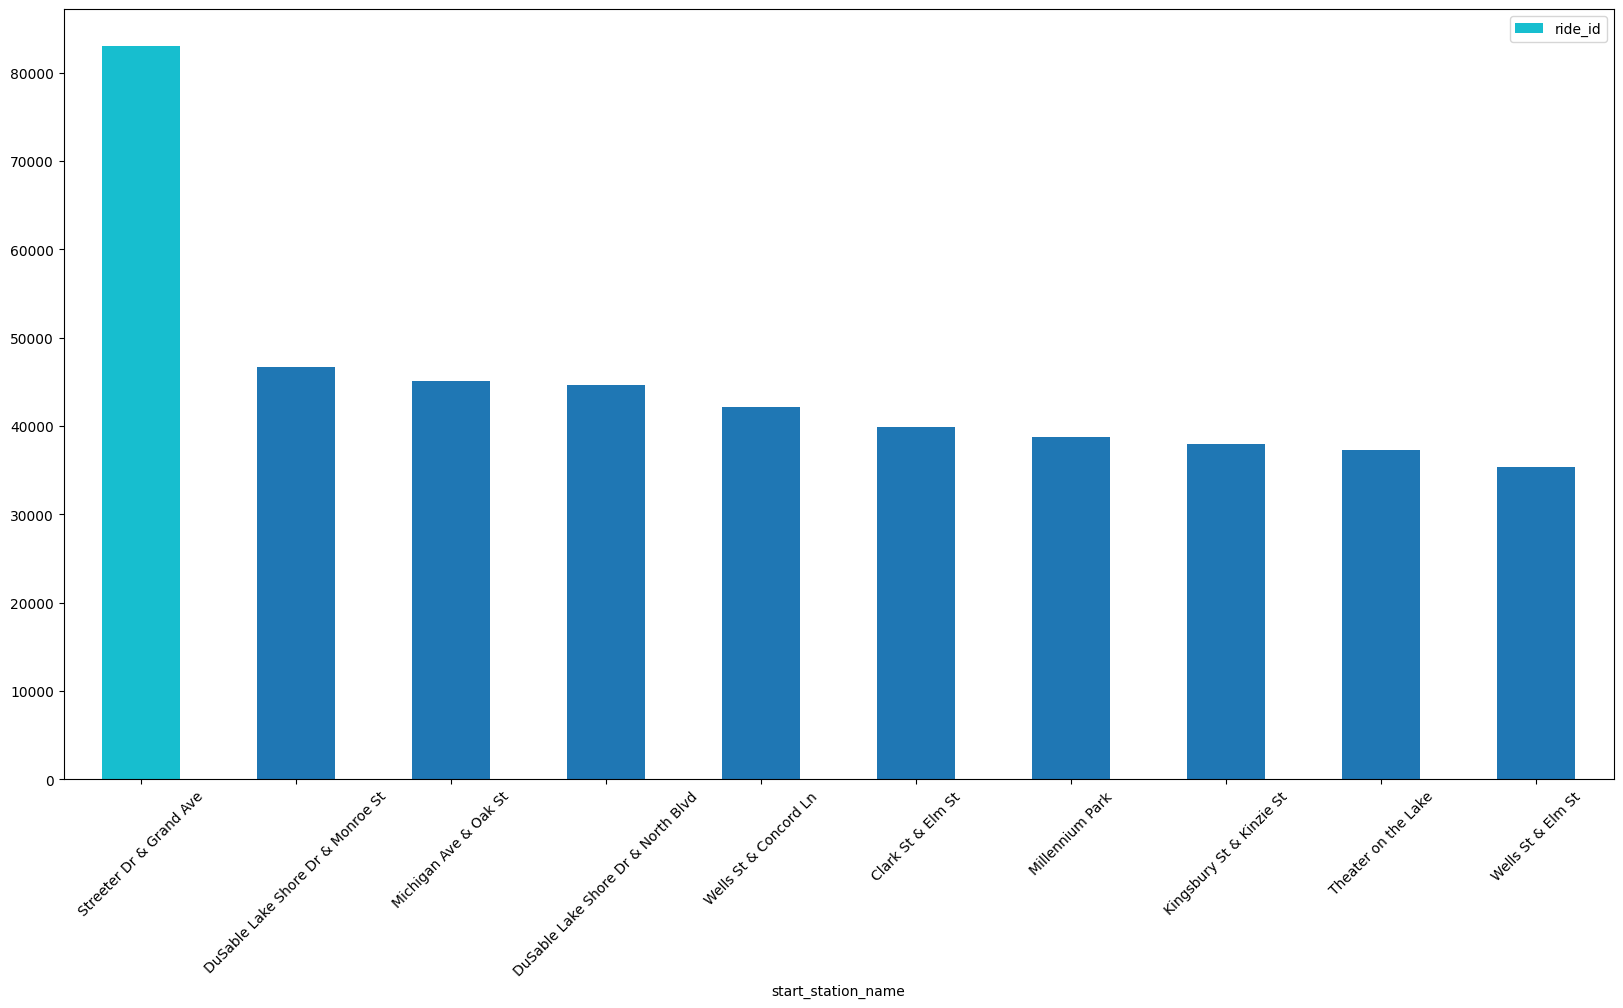

In [13]:
#group by data berdasarkan start_station_name dan mengecualikan data yang start_station_name nya null atau Unknown
count_by_station = df[df['start_station_name'] != 'Unknown'].groupby(['start_station_name'])['ride_id'].count().reset_index()
#sort data berdasarkan total order terbanyak
count_by_station = count_by_station.sort_values(by='ride_id',ascending=False)
#memberikan warna highlight untuk total order terbanyak
colors = ["#17becf" if i == count_by_station['ride_id'].max() else "#1f77b4" for i in count_by_station['ride_id']]
#memunculkan bar pada data (hanya 10 data teratas)
count_by_station.head(10).plot.bar(y='ride_id', x='start_station_name', figsize = (20,10), rot=45, color=colors)

Hasil dari pengamatan ini bahwa banyak perental memulai meminjam sepeda dari stasiun **Streeter Dr & Grand Ave** dengan total order diatas **80.000** order

##### Apakah trip oleh member **Cycler** lebih banyak dibandingkan dengan pengguna **Cycler** biasa?

<Axes: ylabel='ride_id'>

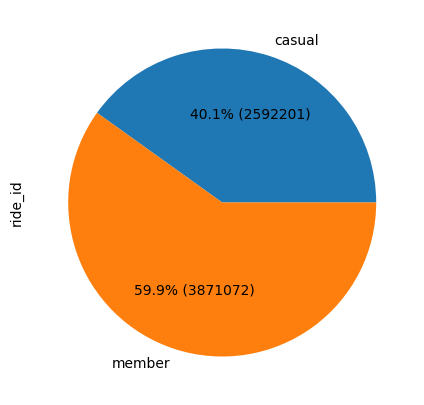

In [14]:
#group by data berdasarkan tipe member
count_by_member_type = df.groupby(['member_casual'])['ride_id'].count()
#fungsi untuk nilai value pada pie chart dimana hasilnya persen (nilai total)
def func(pct):
  return "{:1.1f}% ({})".format(pct, round(count_by_member_type.sum() * pct / 100))
#memunculkan pie untuk data total order per tipe member
count_by_member_type.head(10).plot.pie(y='ride_id', autopct= lambda pct: func(pct), figsize = (5,5))

Kebanyakan order berasal dari member **Cycler** dengan total order **3.871.072** order atau **59,9%** berasal dari member **Cycler**

##### Di hari apa, rata-rata sepeda direntalkan dengan waktu paling lama?

<Axes: xlabel='day_week_start'>

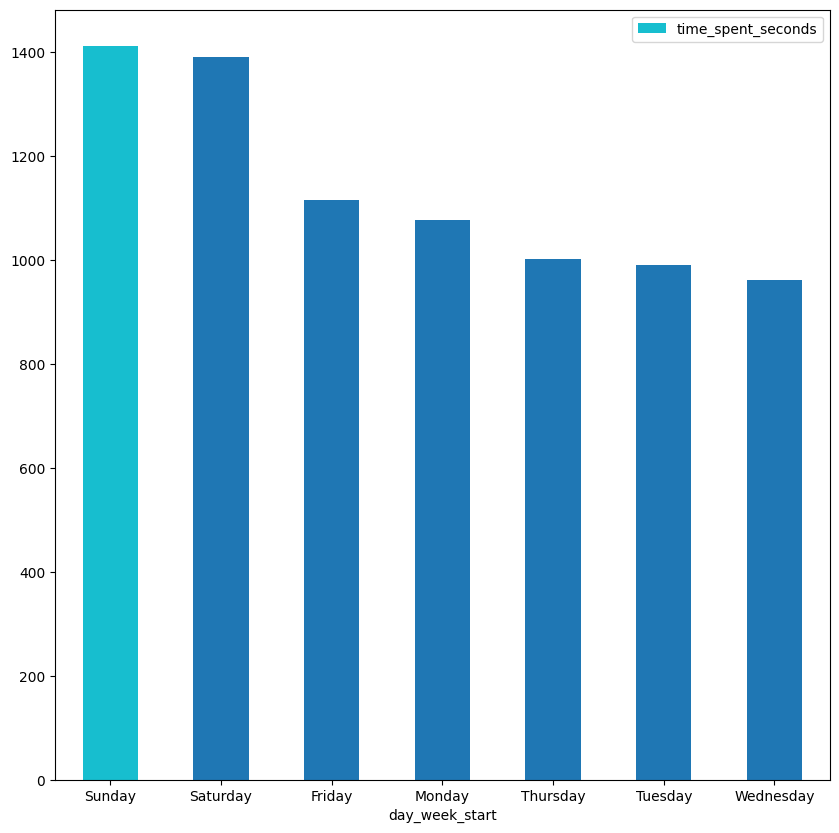

In [15]:
#group by data berdasarkan hari peminjaman sepeda dan mendapatkan rata rata dari waktu peminjaman sepeda
mean_spent_by_day_name = df.groupby(['day_week_start'])['time_spent_seconds'].mean().reset_index()
#sort data berdasarkan rata-rata waktu peminjaman terlama
mean_spent_by_day_name = mean_spent_by_day_name.sort_values(by='time_spent_seconds',ascending=False)
#memberikan warna highlight untuk rata-rata waktu peminjaman terlama
colors = ["#17becf" if i == mean_spent_by_day_name['time_spent_seconds'].max() else "#1f77b4" for i in mean_spent_by_day_name['time_spent_seconds']]
#memunculkan bar pada data
mean_spent_by_day_name.plot.bar(y='time_spent_seconds', x='day_week_start', figsize = (10,10), rot=0, color=colors)

Rata - rata pengguna sepeda memakai sepeda paling lama di hari **Sabtu** dengan waktu peminjaman diatas **1400 detik**

##### Jenis sepeda apa yang paling banyak dipinjam oleh para perental setiap harinya?

<Axes: xlabel='day_week_start'>

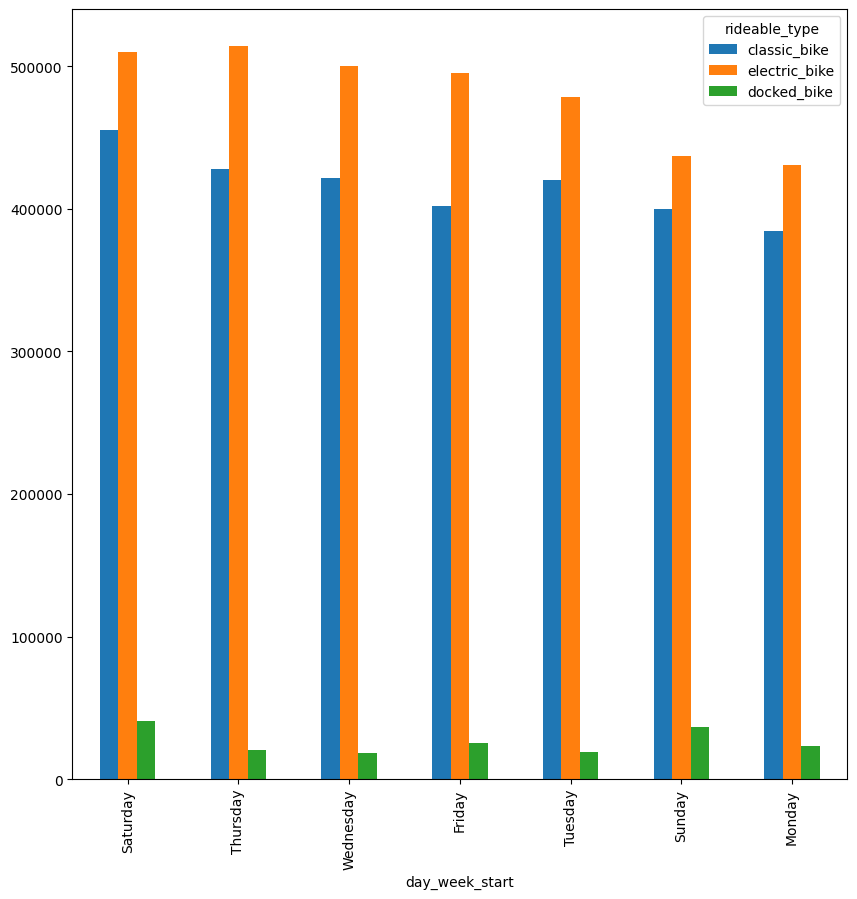

In [16]:
#group by data berdasarkan hari peminjaman sepeda dan tipe sepeda serta mendapatkan total ordernya
count_by_day_name_and_type = df.groupby(['day_week_start','rideable_type'])['ride_id'].count()
#mengubah dataframe yang dari multiindex menjadi column untuk mempermudah pembuatan bar
count_by_day_name_and_type = count_by_day_name_and_type.unstack()
#mendapatkan total order keseluruhan
count_by_day_name_and_type['total'] = count_by_day_name_and_type['classic_bike'] + count_by_day_name_and_type['docked_bike'] + count_by_day_name_and_type['electric_bike']
#sort berdasarkan total keseluruhan order terbanyak
count_by_day_name_and_type = count_by_day_name_and_type.sort_values(by='total', ascending=False)
#menampilkan bar chart pada data kecuali data total order
count_by_day_name_and_type[['classic_bike','electric_bike','docked_bike']].plot.bar(figsize = (10,10), stacked=False)

Dari hasil analisa diatas, dapat dilihat bahwa setiap harinya **sepeda elektrik** merupakan sepeda yang paling sering dipinjam.

##### Di hari apa para perental paling banyak meminjam sepeda?

<Axes: xlabel='day_week_start'>

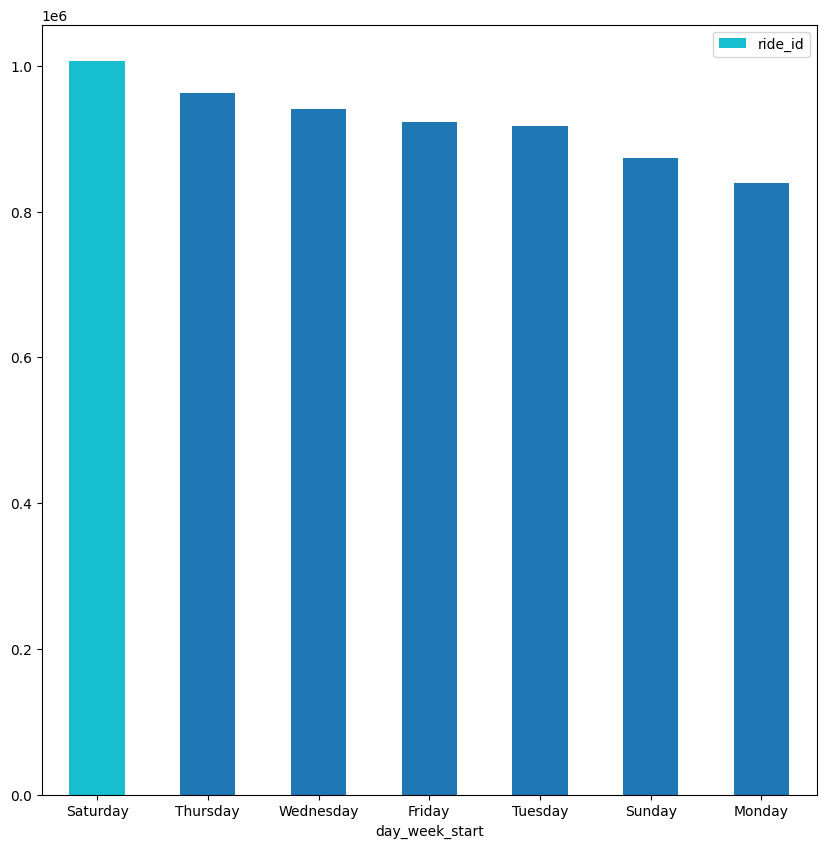

In [17]:
#group by data berdasarkan hari peminjaman sepeda dan mendapatkan total ordernya
count_by_day_name = df.groupby(['day_week_start'])['ride_id'].count().reset_index()
#sort berdasarkan total order terbanyak
count_by_day_name = count_by_day_name.sort_values(by='ride_id',ascending=False)
#memberikan warna highlight untuk total order terbanyak
colors = ["#17becf" if i == count_by_day_name['ride_id'].max() else "#1f77b4" for i in count_by_day_name['ride_id']]
#menampilkan bar chart pada data
count_by_day_name.plot.bar(y='ride_id', x='day_week_start', figsize = (10,10), rot=0, color=colors)

Hasil pengamatan dari grafik ini ialah, total peminjaman terbanyak selama setahun belakangan dilakukan di hari **Sabtu** dengan total order diatas **1.000.000 order**

##### Di hari paling ramai perental meminjam sepeda, apakah member **Cycler** lebih banyak merental sepeda dibandingkan peminjam biasa?

<Axes: ylabel='ride_id'>

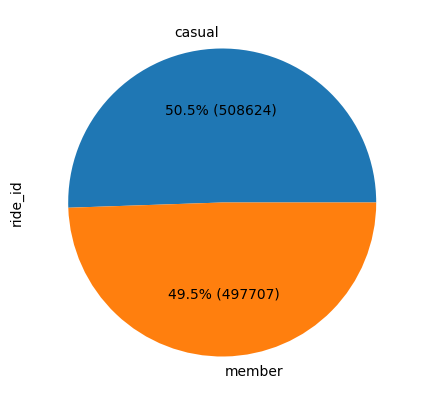

In [18]:
#group by data berdasarkan tipe member khusus pada data hari Sabtu
count_by_member_type_saturday = df[df['day_week_start'] == 'Saturday'].groupby(['member_casual'])['ride_id'].count()
#fungsi untuk nilai value pada pie chart dimana hasilnya persen (nilai total)
def func(pct):
  return "{:1.1f}% ({})".format(pct, round(count_by_member_type_saturday.sum() * pct / 100))
#memunculkan pie untuk data total order per tipe member
count_by_member_type_saturday.plot.pie(y='ride_id', autopct= lambda pct: func(pct), figsize = (5,5))

Di hari Sabtu, peminjaman sepeda lebih banyak dipinjam oleh para pengguna **Cycler** biasa dengan total peminjaman sebanyak **508.624 kali** atau **50,5%** order.

##### Di hari paling ramai perental meminjam sepeda, kebanyakan para perental meminjam sepeda berapa lama?

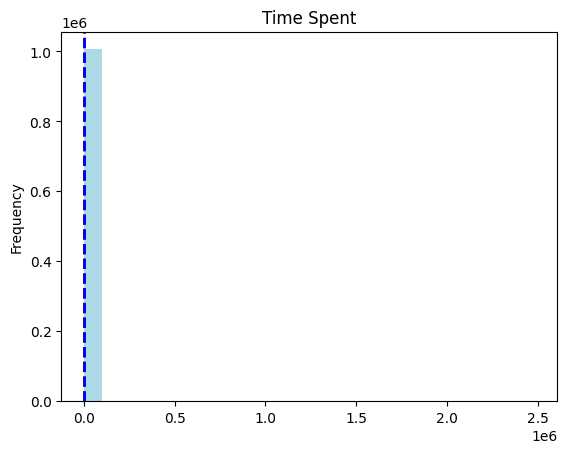

In [19]:
#Membuat histogram untuk melihat pemusatan data pada waktu peminjaman sepeda
df_saturday = df[df['day_week_start'] == 'Saturday']
df_saturday['time_spent_seconds'].plot.hist(title='Time Spent', color='lightblue', bins=25)  
plt.axvline(df_saturday['time_spent_seconds'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_saturday['time_spent_seconds'].median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df_saturday['time_spent_seconds'].mode()[0], color='blue', linestyle='dashed', linewidth=2)
plt.show()

In [20]:
# menghitung bins pada histogram
n, bins = np.histogram(df_saturday['time_spent_seconds'], bins=25)

# mencetak nilai pada setiap bins
for ii in range(0, len(n)):
  print('Bins Border - ' , ii, ': ', bins[ii], ' - ', bins[ii+1], '\t', ' Frequency : ', n[ii])

print('Nilai skewness:', df['time_spent_seconds'].skew())

Bins Border -  0 :  1.0  -  99330.36 	  Frequency :  1005961
Bins Border -  1 :  99330.36  -  198659.72 	  Frequency :  96
Bins Border -  2 :  198659.72  -  297989.08 	  Frequency :  59
Bins Border -  3 :  297989.08  -  397318.44 	  Frequency :  33
Bins Border -  4 :  397318.44  -  496647.8 	  Frequency :  26
Bins Border -  5 :  496647.8  -  595977.16 	  Frequency :  15
Bins Border -  6 :  595977.16  -  695306.52 	  Frequency :  19
Bins Border -  7 :  695306.52  -  794635.88 	  Frequency :  37
Bins Border -  8 :  794635.88  -  893965.24 	  Frequency :  29
Bins Border -  9 :  893965.24  -  993294.6 	  Frequency :  14
Bins Border -  10 :  993294.6  -  1092623.96 	  Frequency :  6
Bins Border -  11 :  1092623.96  -  1191953.32 	  Frequency :  5
Bins Border -  12 :  1191953.32  -  1291282.68 	  Frequency :  17
Bins Border -  13 :  1291282.68  -  1390612.04 	  Frequency :  0
Bins Border -  14 :  1390612.04  -  1489941.4 	  Frequency :  0
Bins Border -  15 :  1489941.4  -  1589270.76 	  Freq

<Axes: title={'center': 'Time Spent'}>

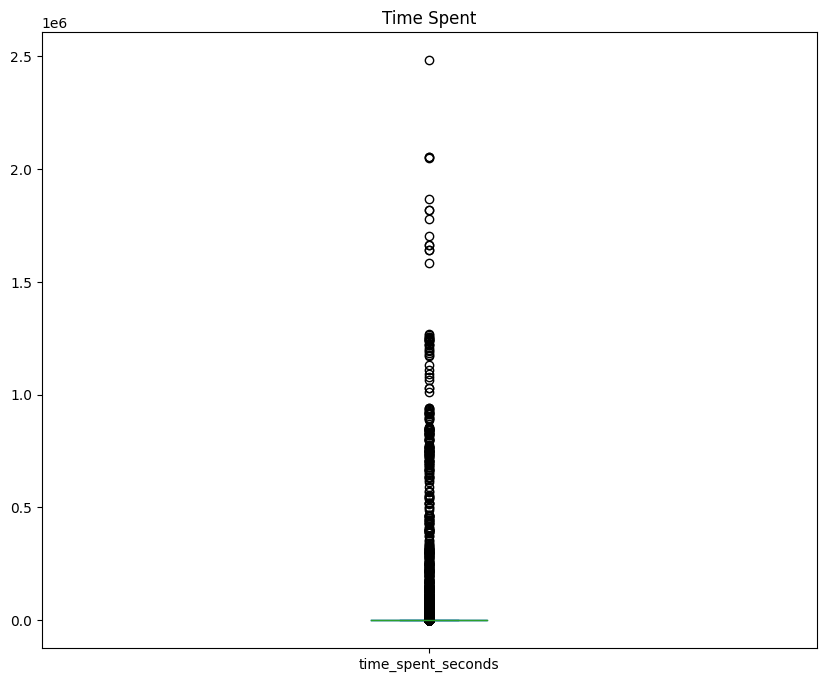

In [21]:
#Membuat boxplot untuk melihat outlier dari waktu peminjaman
df_saturday['time_spent_seconds'].plot(kind='box', title='Time Spent', figsize=(10,8))

Dapat dilihat bahwa data pemakaian sepeda lebih condong ke kiri, sehingga perlu dihapus outlier-outlier untuk dapat menyimpulkan berapa lama para perental biasanya meminjam sepeda

In [22]:
#Mendapat nilai Q3 dan Q1
Q1 = df_saturday['time_spent_seconds'].quantile(0.25)
Q3 = df_saturday['time_spent_seconds'].quantile(0.75)
#Mendapat nilai IQR
IQR = Q3-Q1
#Mendapat nilai lower limit dan upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
#Membersihkan data waktu peminjaman dari data outlier
df_saturday_no_outlier = df_saturday[(df_saturday['time_spent_seconds']<=upper_limit) & (df_saturday['time_spent_seconds']>=lower_limit)] 

Setelah outlier dibersihkan, mari lihat pemusatan datanya

In [23]:
# menghitung bins pada histogram
n, bins = np.histogram(df_saturday_no_outlier['time_spent_seconds'], bins=25)

# mencetak nilai pada setiap bins
for ii in range(0, len(n)):
  print('Bins Border - ' , ii, ': ', bins[ii], ' - ', bins[ii+1], '\t', ' Frequency : ', n[ii])

print('Nilai skewness:', df_saturday_no_outlier['time_spent_seconds'].skew())

Bins Border -  0 :  1.0  -  105.72 	  Frequency :  36269
Bins Border -  1 :  105.72  -  210.44 	  Frequency :  58193
Bins Border -  2 :  210.44  -  315.15999999999997 	  Frequency :  89839
Bins Border -  3 :  315.15999999999997  -  419.88 	  Frequency :  95297
Bins Border -  4 :  419.88  -  524.6 	  Frequency :  91117
Bins Border -  5 :  524.6  -  629.3199999999999 	  Frequency :  80770
Bins Border -  6 :  629.3199999999999  -  734.04 	  Frequency :  70809
Bins Border -  7 :  734.04  -  838.76 	  Frequency :  59612
Bins Border -  8 :  838.76  -  943.48 	  Frequency :  51832
Bins Border -  9 :  943.48  -  1048.2 	  Frequency :  44542
Bins Border -  10 :  1048.2  -  1152.92 	  Frequency :  37279
Bins Border -  11 :  1152.92  -  1257.6399999999999 	  Frequency :  32550
Bins Border -  12 :  1257.6399999999999  -  1362.36 	  Frequency :  27907
Bins Border -  13 :  1362.36  -  1467.08 	  Frequency :  24349
Bins Border -  14 :  1467.08  -  1571.8 	  Frequency :  20706
Bins Border -  15 :  157

Meskipun pemusatan datanya masih cenderung ke kiri, namun kita sudah bisa melihat penyebaran datanya dengan lebih baik dibandingkan sebelumnya

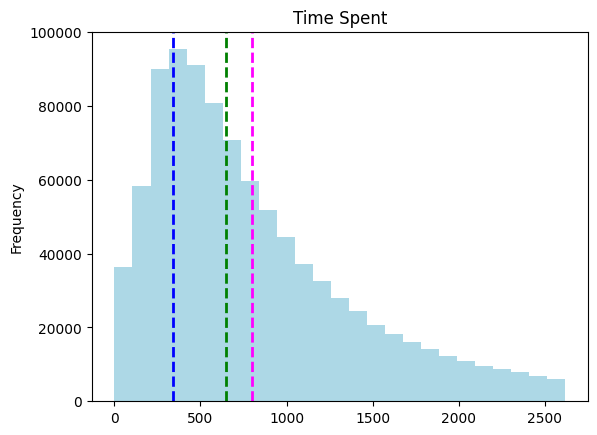

In [24]:
#Membuat histogram untuk melihat pemusatan data pada beban sampah di TDS LANDFILL
df_saturday_no_outlier['time_spent_seconds'].plot.hist(title='Time Spent', color='lightblue', bins=25)  
plt.axvline(df_saturday_no_outlier['time_spent_seconds'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_saturday_no_outlier['time_spent_seconds'].median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df_saturday_no_outlier['time_spent_seconds'].mode()[0], color='blue', linestyle='dashed', linewidth=2)
plt.show()

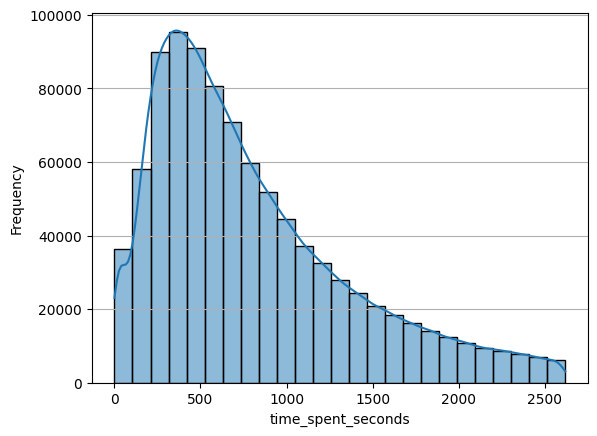

In [25]:
#Membuat histogram dari seaborn untuk melihat distribusi data
fig, ax = plt.subplots()
sns.histplot(df_saturday_no_outlier['time_spent_seconds'], bins=25, kde=True)
ax.set_ylabel('Frequency')
ax.grid(axis='y')

In [26]:
#Mendapatkan nilai central tedency dari data waktu peminjaman
print('Average of time spent:',df_saturday_no_outlier['time_spent_seconds'].mean())
print('Median of time spent:',df_saturday_no_outlier['time_spent_seconds'].median())
print('Mode of time spent:',df_saturday_no_outlier['time_spent_seconds'].mode()[0])

Average of time spent: 802.2780102986655
Median of time spent: 649.0
Mode of time spent: 340.0


Dari hasil pengamatan diatas, dapat dikatakan bahwa kebanyakan perental pada hari Sabtu meminjam sepeda dalam rentang waktu **315.16 - 419.88 detik** atau **5 - 7 menit** dengan paling banyak peminjaman selama **340 detik**

##### Target pemakaian sepeda setahun terakhir adalah 12,5 menit, Apakah rata rata waktu peminjaman sepeda kita selama setahun terakhir lebih lama dari 12,5 menit atau 990 detik?

Dikarenakan kita ingin tau apakah rata-rata pemakaian sepeda mencapai target di tahun terakhir, maka kita perlu melakukan uji hipotesis. Uji hipotesis yang dilakukan ialah melihat apakah rata - rata perhari penggunaan sepeda mencapai 990 detik.\
**H0: μ <= 990**\
**H1: μ > 990**

In [27]:
#Mendapatkan rata-rata pemakaian sepeda per harinya
df_grouped = df[['started_date','time_spent_seconds']].groupby(['started_date']).mean()

In [28]:
df_grouped

,time_spent_seconds
started_date,
2022-05-01,1063.210955
2022-05-02,846.704655
2022-05-03,649.429118
2022-05-04,905.173337
2022-05-05,815.773090
...,...
2023-05-27,1444.988667
2023-05-28,1475.340606
2023-05-29,1466.813549


In [29]:
#menghitung t-stat dan nilai p
t_stat,p_val = stats.ttest_1samp(df_grouped['time_spent_seconds'], 990)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.005253423225974586
t-statistics: 2.570963217410974


In [30]:
len(df_grouped)

396

C:\Users\Evaldo Raynardi\AppData\Local\Temp\ipykernel_28360\690635246.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pop, label='Daily Average Time Spent', color='blue')


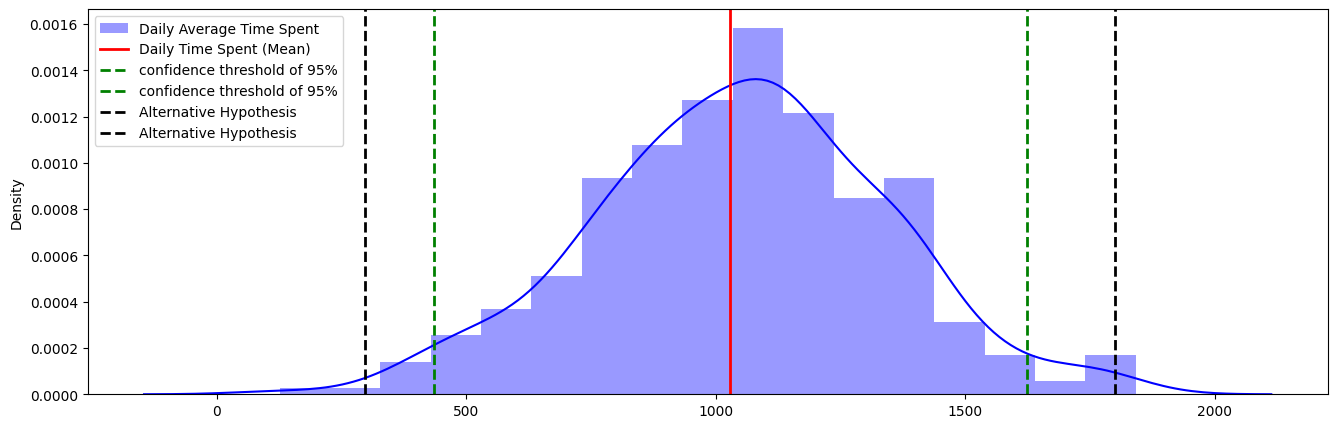

In [31]:
# Membuat histogram untuk melihat hasil uji hipotesis
df_pop = np.random.normal(df_grouped['time_spent_seconds'].mean(), df_grouped['time_spent_seconds'].std(), 350)

ci = stats.norm.interval(0.95, df_grouped['time_spent_seconds'].mean(), df_grouped['time_spent_seconds'].std())

plt.figure(figsize=(16,5))
sns.distplot(df_pop, label='Daily Average Time Spent', color='blue')
plt.axvline(df_grouped['time_spent_seconds'].mean(), color='red', linewidth=2, label='Daily Time Spent (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(df_pop.mean() + t_stat*df_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(df_pop.mean() - t_stat*df_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Hasil pengamatan yang didapat ialah Cycler berhasil mencapai target pemakaian sepedanya setahun dengan rata rata pemakaian sepeda selama **12,5 menit** atau **990 detik**.

### Kesimpulan
Stasiun Cycler yang paling banyak mendapatkan order dalam satu tahun belakangan ialah stasiun **Streeter Dr & Grand Ave** dengan total order lebih banyak dari **80.000 order**. Order yang didapatkan sendiri lebih banyak didapatkan oleh para member Cycler dengan **59,9%** berasal dari member. Dimana rata-rata waktu pemakaian sepeda terlama dilakukan di hari **Minggu**. Sepeda yang paling banyak digunakan merupakan sepeda dengan jenis **sepeda elektrik**. Meskipun rata-rata waktu pemakaian sepeda terlama ada di hari **Minggu**, order paling banyak selama setahun ini didapatkan di hari **Sabtu**. Dimana pada hari **Sabtu**, order lebih banyak didapatkan dari pengguna biasa dibanding member dengan persentase order dari pengguna biasa sebesar **50,5%**. Di hari **Sabtu** juga, para perental paling banyak menyewa sepeda dalam rentang waktu **5 - 7 menit**. Dalam target tahun lalu yang dimana rata-rata pemakaian sepeda selama **12,5 menit** juga berhasil dicapai oleh Cycler.\
Strategi yang dapat dilakukan oleh Cycler untuk menkonversi **10%** pelanggan biasa menjadi member selama bulan **Juni 2023** sampai **September 2023** ialah:
- Memberikan diskon penggunaan sepeda elektrik khusus member baru di bulan Juni 2023 - September 2023
- Memberikan promo khusus member dimana setiap weekend para pengguna dapat diskon 10%